d:\Basudev\genaiprereq\Day1\gnipre\Lib\site-packages\transformers\generation\utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Caption: a red apple with a green stem


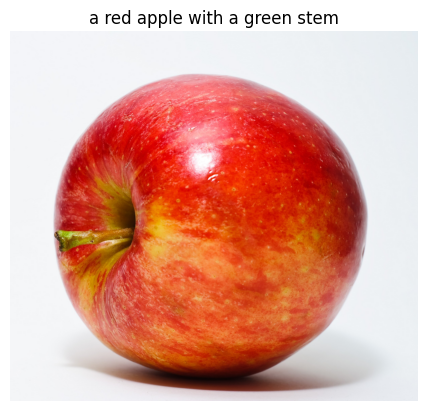

In [1]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import matplotlib.pyplot as plt
import os

# Workaround for the OpenMP runtime issue
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Load the BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Use a simpler image of a single apple
url = "https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers, stream=True)

if response.status_code == 200:
    image = Image.open(response.raw)
    # Preprocess the image and generate a caption
    inputs = processor(image, return_tensors="pt")
    output = model.generate(**inputs)

    # Decode the generated caption
    caption = processor.decode(output[0], skip_special_tokens=True)
    print("Generated Caption:", caption)

    # Display and save the image with caption
    plt.imshow(image)
    plt.axis("off")
    plt.title(caption)
    plt.savefig("captioned_simple_image.png")  # Save the image with the caption
    plt.show()
else:
    print(f"Failed to load image from URL, status code: {response.status_code}")
